# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from matplotlib.lines import Line2D

# Read Data

In [2]:
allData = pd.read_excel("pnas.1409497111.sd01.xlsx", index_col=0)

/home/brodyee/anaconda3/envs/py/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
endInfo = allData.iloc[-8:]
justData = allData.iloc[:-8]

In [4]:
justData

,submitted_subject_id,submitted_sample_id,Day of life sample obtained,Gestational age at birth - weeks,postconceptional age when sample obtained,gender,mode of birth,Period of study,Room category,milk,...,Deinococci,OP11_no_class,Verrucomicrobiae,Acidobacteria_Gp6,Nitrospira,Subdivision3,Gemmatimonadetes,Opitutae,Holophagae,unclassified
Subject,,,,,,,,,,,,,,,,,,,,,
1,18695.0,89503812.0,54.08,26.0,33.725714,0.0,1.0,1.0,open,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,18695.0,89503813.0,56.00,26.0,34.000000,0.0,1.0,1.0,open,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
1,18695.0,89515725.0,59.13,26.0,34.447143,0.0,1.0,1.0,open,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
1,18695.0,89515718.0,60.00,26.0,34.571429,0.0,1.0,1.0,open,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
1,18695.0,89504094.0,67.50,26.0,35.642857,0.0,1.0,1.0,open,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,120434.0,124120652.0,52.04,23.1,30.534286,0.0,0.0,2.0,Single,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58,120434.0,124120644.0,52.94,23.1,30.662857,0.0,0.0,2.0,Single,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
58,120434.0,124120646.0,53.19,23.1,30.698571,0.0,0.0,2.0,Single,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Data Structure

In [5]:
# Episodes of bloodstream infections that occurred in members of this cohort
endInfo.index

Index([                                                                                                                                        nan,
                                                            'Subject 7 had a blood culture positive for coagulase negative Staphylococci on DOL 7',
                                                                     'Subject 13 had a blood culture positive for Group B Streptococci on DOL 60.',
                    'Subject 24 had a blood culture positive for coagulase negative Staphylococci on DOL 19 and Pseudomonas aeruginosa on DOL 28.',
                      'Subject 40 had a blood culture positive for coagulase negative Staphylococci on DOL 17 and Group B Streptococci on DOL 50.',
                                               'Subject 41 had a blood culture positive for methicillin-resistant Staphylococcus aureus on DOL 27',
       'Subject 49 had a blood culture positive for methicillin-susceptible Staphylococcus aureus and coagulase 

In [6]:
# Splitting Counts and Covariates
X = justData.iloc[:, :11]
Y = justData.iloc[:, 11:]

In [7]:
print("Number of taxa in dataset:", len(Y.columns))
Y.columns

Number of taxa in dataset: 29


Index(['Actinobacteria', 'Alphaproteobacteria', 'Bacilli', 'Bacteroidia',
       'Betaproteobacteria', 'Clostridia', 'Cyanobacteria',
       'Epsilonproteobacteria', 'Erysipelotrichi', 'Flavobacteria',
       'Fusobacteria', 'Gammaproteobacteria', 'Mollicutes',
       'Bacteroidetes_no_class', 'Sphingobacteria', 'Deltaproteobacteria',
       'OD1_no_class', 'TM7_no_class', 'Thermomicrobia', 'Deinococci',
       'OP11_no_class', 'Verrucomicrobiae', 'Acidobacteria_Gp6', 'Nitrospira',
       'Subdivision3', 'Gemmatimonadetes', 'Opitutae', 'Holophagae',
       'unclassified'],
      dtype='object')

In [8]:
X.columns

Index(['submitted_subject_id', 'submitted_sample_id',
       'Day of life sample obtained', 'Gestational age at birth - weeks',
       'postconceptional age when sample obtained', 'gender', 'mode of birth',
       'Period of study', 'Room category', 'milk', 'days of antibiotics'],
      dtype='object')

# Resturcture Data

- **Day of life sample obtained**: Days after birth the sample was obtained.
- **Gestational age at birth (weeks)**: Number of weeks pregnant at time of birth. All are premature, ranging from 25 to 35 weeks. Days represented as 0.10 = 1 d, 0.2 = 2 d, 0.3 = 3 d, 0.4 = 4 d, 0.5 = 5 d, 0.6 = 6 d
- **Postconceptional age when sample obtained**: Synonymous with postmenstrual age, which is equal to the sum of gestational age at birth plus day of life.
- **Gender**: 0 = female, 1 = male
- **Mode of birth**: 0 = vaginal delivery, 1 = Caesarian section
- **Period of study**: If the sample was obtianed before or after the sampling structure was changed. (1 = before, 2 = after)
- **Room category**: Type m bof room baby was in (single = single room, open = multipatient room)
- **Milk**:  Breast milk volume (0 = 0%, 1 = <10%, 2 = 10–50%, 3 = >50% of enteral volume)
- **Days of antibiotics**: Total days prior to sample being obtained on which antibiotics were administered

In [9]:
# Getting rid of columns not going to be used
X = X.drop(["submitted_subject_id", "submitted_sample_id", "postconceptional age when sample obtained"], axis=1)
# Sorting by subject and day sampled
Y["Day of life sample obtained"] =  X["Day of life sample obtained"] # adding to be able to align datasets
X = X.sort_values(by=["Subject", "Day of life sample obtained"])
Y = Y.sort_values(by=["Subject", "Day of life sample obtained"])

In [10]:
X["gender"] = X["gender"].astype("category").cat.rename_categories({0 : "female", 1 : "male"})
X["mode of birth"] = X["mode of birth"].astype("category").cat.rename_categories({0 : "vaginal delivery", 1 : "caesarian section"})
X["Room category"] = X["Room category"].astype("category")
X["milk"] = X["milk"].astype("category").cat.rename_categories({0 : "0%", 1 : "< 10%", 2 : "10–50%", 3 : "> 50%"})
X["Period of study"] = X["Period of study"].astype("category").cat.rename_categories({1 : "before", 2 : "after"})
X.head()

,Day of life sample obtained,Gestational age at birth - weeks,gender,mode of birth,Period of study,Room category,milk,days of antibiotics
Subject,,,,,,,,
1,54.08,26.0,female,caesarian section,before,open,< 10%,17.0
1,56.00,26.0,female,caesarian section,before,open,< 10%,17.0
1,59.13,26.0,female,caesarian section,before,open,< 10%,17.0
1,60.00,26.0,female,caesarian section,before,open,< 10%,17.0
1,67.50,26.0,female,caesarian section,before,open,< 10%,17.0


In [11]:
X[["gender","mode of birth","Room category","milk","Period of study"]].describe()

,gender,mode of birth,Room category,milk,Period of study
count,922,922,922,922,922
unique,2,2,2,4,2
top,female,caesarian section,Single,> 50%,before
freq,557,698,494,434,665


In [12]:
# checking if any category changes over time
X[["gender","mode of birth","Room category","milk","Period of study"]].groupby(X.index).nunique().nunique()

gender             1
mode of birth      1
Room category      1
milk               1
Period of study    1
dtype: int64

In [13]:
# Count the number of infants with each cat of milk
X["milk"].groupby(X.index).apply(lambda x : x.iloc[0]).value_counts()

milk
> 50%     22
10–50%    18
< 10%     16
0%         2
Name: count, dtype: int64

In [14]:
# collapsing 0% with < 10%
X.loc[X["milk"] == "0%", "milk"] = "< 10%"

In [15]:
# Convert the Gestational age at birth (weeks) to the decimal being the fractional portion of the week. so 1/7 instead of .1 for one day beyond a week
def convertToFraction(weeks):
    numWeeks = int(weeks)
    fractionalDays = (10*(weeks - numWeeks))/7

    return numWeeks + fractionalDays
    
X["Gestational age at birth - weeks"] = X["Gestational age at birth - weeks"].apply(convertToFraction)

In [16]:
# Adding proportion of days on antibiotic up until that point
X["Proportion days on antibiotics"] = X["days of antibiotics"].div(X["Day of life sample obtained"])
# Removing days of antibiotics
X = X.drop("days of antibiotics", axis=1)

In [17]:
# Keeping the taxa with greater than 5 infants that have at least 1 observation
colKeep = (Y != 0).groupby(Y.index).apply(lambda x : x.any()).mean()*len(np.unique(Y.index)) > 5
Y = Y.loc[:, colKeep]

In [18]:
proportionOfZeros = ((Y == 0)*1).describe().loc["mean"]
proportionOfZeros

Actinobacteria                 0.302603
Alphaproteobacteria            0.786334
Bacilli                        0.013015
Bacteroidia                    0.674620
Betaproteobacteria             0.649675
Clostridia                     0.088937
Cyanobacteria                  0.929501
Epsilonproteobacteria          0.924078
Erysipelotrichi                0.955531
Flavobacteria                  0.805857
Fusobacteria                   0.920824
Gammaproteobacteria            0.011931
Sphingobacteria                0.953362
Deltaproteobacteria            0.985900
OD1_no_class                   0.985900
unclassified                   0.195228
Day of life sample obtained    0.000000
Name: mean, dtype: float64

In [19]:
# Saving Datasets
X.to_csv("infantCovariates.csv")
Y.to_csv("infantCounts.csv")

# Composition Plots Over Time

In [20]:
# sanity check that datasets are aligned
all(X["Day of life sample obtained"] == Y["Day of life sample obtained"]) &\
all(X.index == Y.index)

True

In [21]:
Y = Y.drop("Day of life sample obtained", axis=1)

In [22]:
def plotRAIndv(p, ax, labelColors=False, labelX=False, labelY = False, fontsize=10, title=""):
    timePoints = X["Day of life sample obtained"].loc[p]
    taxa = ["Bacilli", "Bacteroidia", "Clostridia", "Gammaproteobacteria"]
    RAs = Y.div(Y.sum(axis=1), axis=0).loc[p][taxa].groupby(np.floor(timePoints)).mean()
    timePointsF = RAs.index

    hatches = ['//', '\\\\', 'o', '.', 'O']
    h = 0
    bottom_values = np.zeros(len(timePointsF))  # Keeps track of the bottom of the stacked bars
    for t in taxa:
        if labelColors:
            label = t
        else:
            label = ""
        ax.bar(timePointsF, RAs[t], width=bar_width, bottom=bottom_values, label=label, edgecolor="black", hatch=hatches[h])
        bottom_values += RAs[t]  # Update bottom position for next genus
        h += 1
    if labelColors:
        label = "Others"
    else:
        label = ""
    ax.bar(timePointsF, 1-bottom_values+.0001, width=bar_width, bottom=bottom_values, label=label, edgecolor="black", hatch=hatches[h])
    
    # Format x-axis to show time points in days
    ax.set_xticks([0, 10, 20, 30, 40, 50 ,60, 70, 80])
    ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=fontsize)
    ax.set_yticks(np.array(range(11))/10)
    ax.set_yticklabels(np.array(range(11))/10, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    if (labelX):
        ax.set_xlabel('Infant Age in Days', fontsize=fontsize)
    if (labelY):
        ax.set_ylabel('Relative Abundance', fontsize=fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

In [23]:
def plotRAoverTime(subset, title, ax, labelColors=False, labelX=False, labelY = False, fontsize=10):
    taxa = ["Bacilli", "Bacteroidia", "Clostridia", "Gammaproteobacteria"]
    timePoints = X["Day of life sample obtained"][subset]
    RAs = Y.div(Y.sum(axis=1), axis=0)[taxa][subset].groupby(np.floor(timePoints)).mean()
    timePointsF = RAs.index
    
    hatches = ['//', '\\\\', 'o', '.', 'O']
    h = 0
    bottom_values = np.zeros(len(timePointsF))  # Keeps track of the bottom of the stacked bars
    for t in taxa:
        if labelColors:
            label = t
        else:
            label = ""
        ax.bar(timePointsF, RAs[t], width=bar_width, bottom=bottom_values, label=label, edgecolor="black", hatch=hatches[h])
        bottom_values += RAs[t]  # Update bottom position for next genus
        h += 1
    if labelColors:
        label = "Others"
    else:
        label = ""
    ax.bar(timePointsF, 1-bottom_values, width=bar_width, bottom=bottom_values, label=label, edgecolor="black", hatch=hatches[h])
    
    # Format x-axis to show time points in days
    ax.set_xticks([0, 10, 20, 30, 40, 50 ,60, 70, 80])
    ax.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=fontsize)
    ax.set_yticks(np.array(range(11))/10)
    ax.set_yticklabels(np.array(range(11))/10, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    if (labelX):
        ax.set_xlabel('Infant Age in Days', fontsize=fontsize)
    if (labelY):
        ax.set_ylabel('Relative Abundance', fontsize=fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

In [24]:
# Enable LaTeX rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

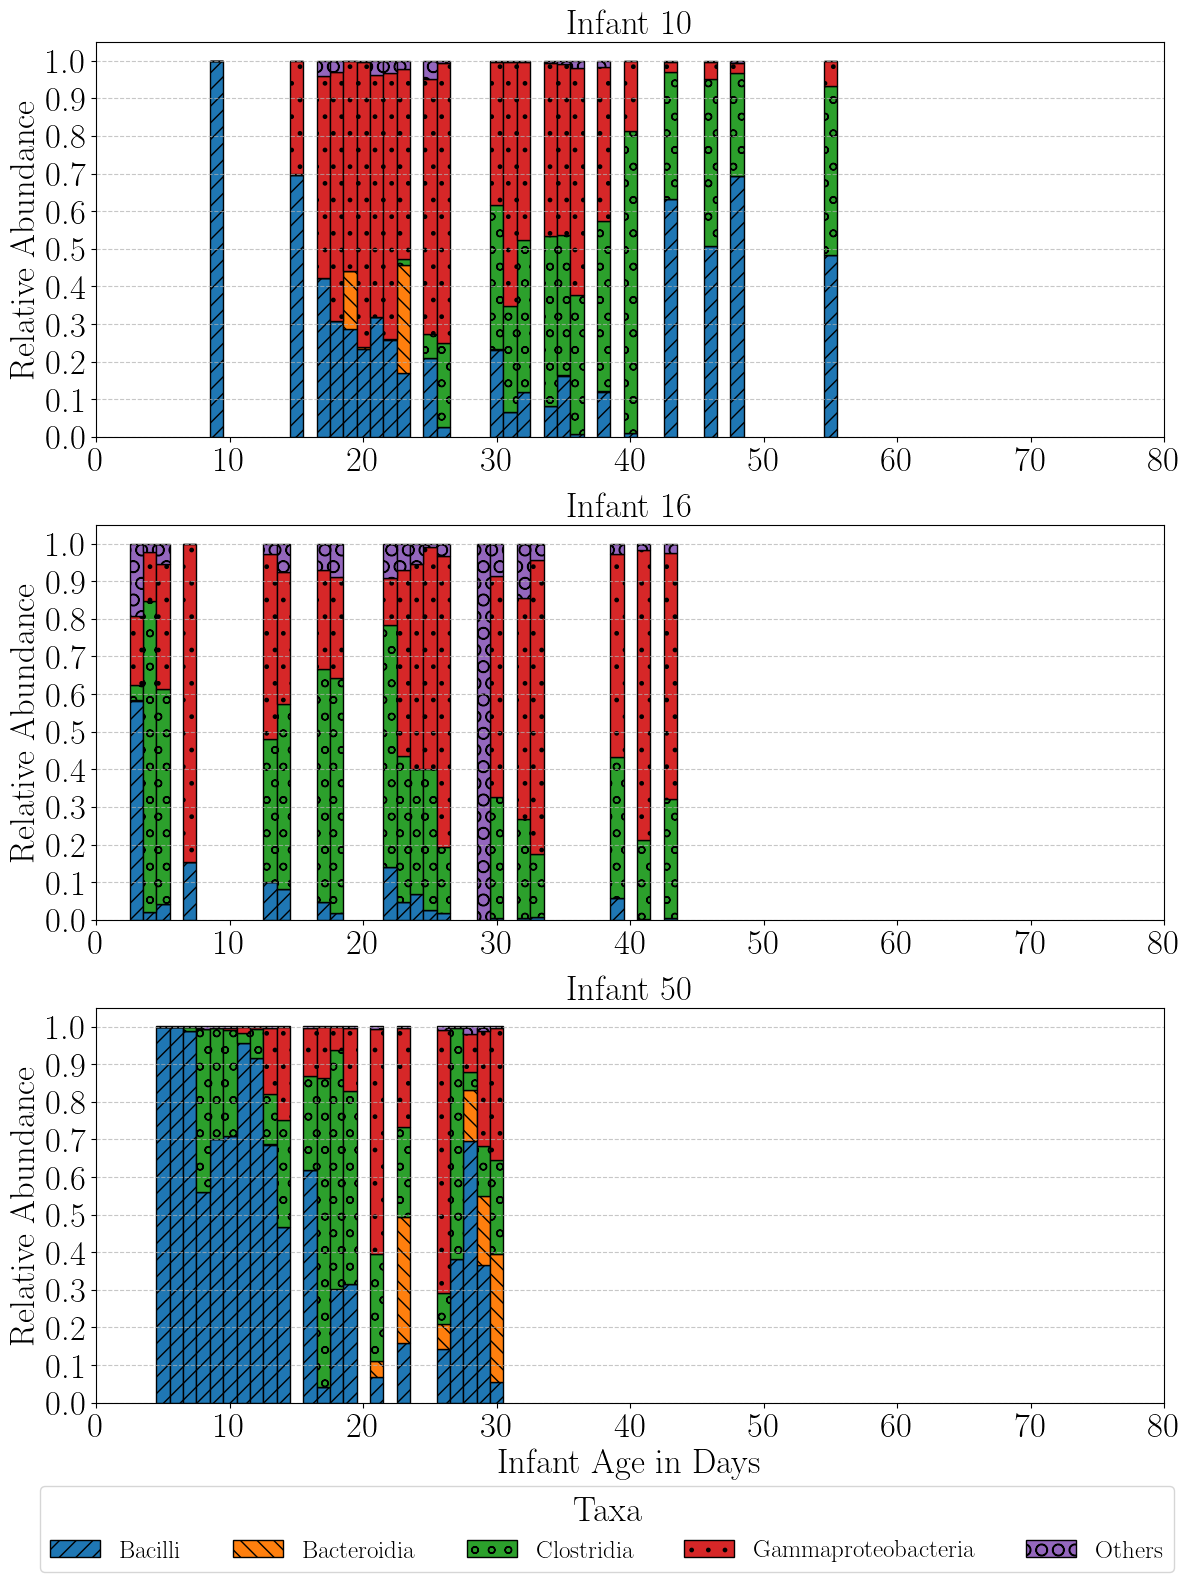

In [25]:
bar_width = 1
fig, ax = plt.subplots(3,1, figsize=(12, 15))
fontsize = 25

plotRAIndv(10, ax[0], labelY=True, fontsize=fontsize, title="Infant 10")
plotRAIndv(16, ax[1], labelY=True, fontsize=fontsize, title="Infant 16")
plotRAIndv(50, ax[2], labelColors=True, labelX=True, labelY=True, fontsize=fontsize, title="Infant 50")

# Add labels and title
plt.subplots_adjust(hspace=0.1, bottom=0.2)  
plt.tight_layout(rect=[0, 0, 1.1, .75]) 
fig.legend(title='Taxa', loc='lower center', ncol=6, bbox_to_anchor=(0.51, -.06), fontsize=18, title_fontsize=fontsize)

# Show grid and plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
fig.savefig("indInfPoster.png", bbox_inches="tight")

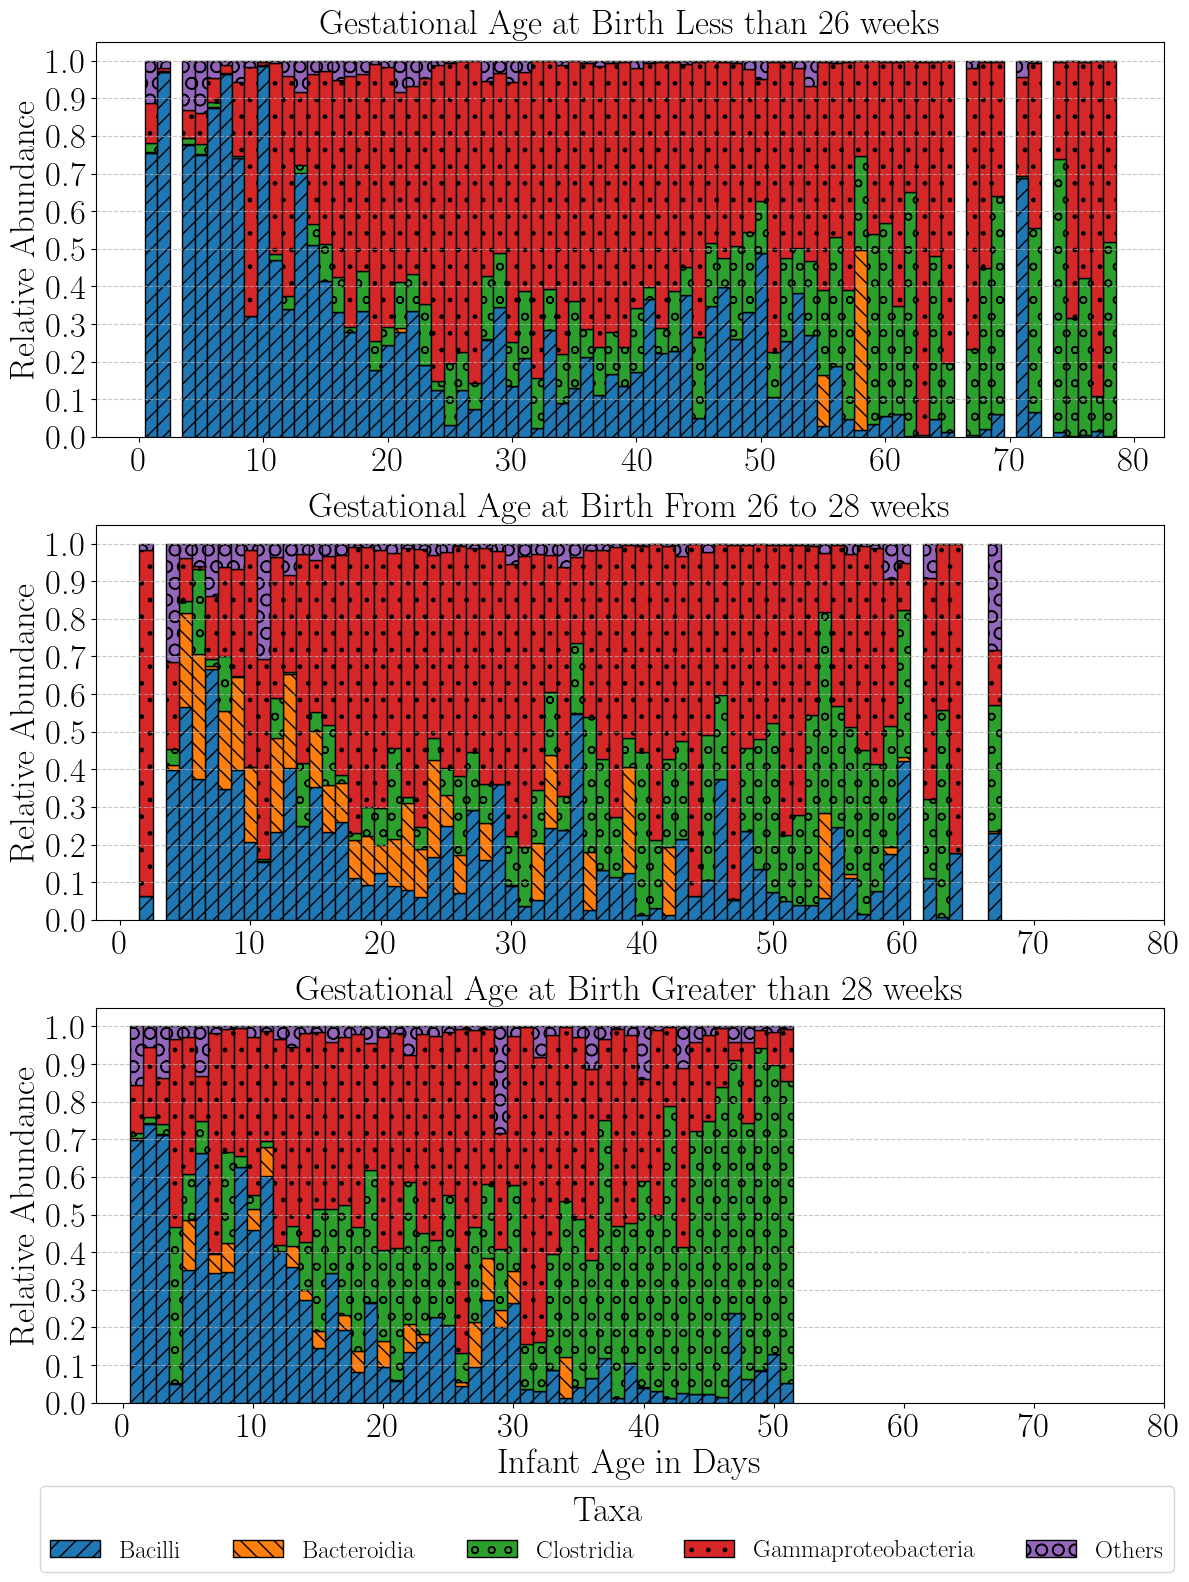

In [26]:
bar_width = 1
fig, ax = plt.subplots(3, 1, figsize=(12, 15))
fontsize = 25
gestAge = X["Gestational age at birth - weeks"]

plotRAoverTime(gestAge < 26, "Gestational Age at Birth Less than 26 weeks", ax[0], labelY=True, fontsize=fontsize)
plotRAoverTime((gestAge >= 26) & (gestAge < 28), "Gestational Age at Birth From 26 to 28 weeks", ax[1], labelY=True, fontsize=fontsize)
plotRAoverTime(gestAge >=  28, "Gestational Age at Birth Greater than 28 weeks", ax[2], labelColors=True, labelX=True, labelY=True, fontsize=fontsize)

# Add labels and title
#fig.supxlabel('Days After Birth', x=0.5, y=0.02, fontsize=fontsize)
fig.legend(title='Taxa', loc='lower center', ncol=6, bbox_to_anchor=(0.51, -.06), fontsize=18, title_fontsize=fontsize)

# Show grid and plot
plt.tight_layout()
plt.show()
fig.savefig("infRAGA.png", bbox_inches="tight")